In [221]:
import pandas as pd
import numpy as np
import re
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns



In [269]:
df = pd.read_csv('data.csv')

In [270]:
df.columns

Index(['Timestamp', 'Sex', 'Height (cm)', 'Weight (KG)', 'Arm Span (cm)',
       'How long have you been climbing for?', 'Where do you climb?',
       'Hardest V Grade ever climbed ',
       'Hardest V Grade climbed in the Last 3 months',
       'The V grade you can send 90-100% of routes ',
       'Hardest Route grade climbed (Ewbank grade) ',
       'Hardest route climbed last 3 months (ewbank)',
       'Route grade you can send 90-100% of climbs',
       'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Hangboard Frequency per week ', 'Hangboard grips used ',
       'Style of Hangboarding chosen ',
       'Max Weight hangboard 18mm edge - Half crimp (KG)  (10 seconds) (added weight only)',
       'Max Weight hangboard 18mm edge - open crimp (KG) (10 seconds)  (added weight only)',
       'Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)',
    

In [271]:
df.head(5).style.set_table_attributes('style="overflow-x: auto; display: inline-block;"')


In [272]:
df.describe()

Frequency of climbing sessions per week  \
count                               661.000000   
mean                                  2.977307   
std                                   1.091746   
min                                   0.000000   
25%                                   2.000000   
50%                                   3.000000   
75%                                   4.000000   
max                                   7.000000   

       Average hours climbing per week (not including training)  \
count                                         661.000000          
mean                                            6.620272          
std                                             3.378113          
min                                             0.000000          
25%                                             4.000000          
50%                                             6.000000          
75%                                             9.000000          
max                                            24.000000          

       Average hours Training for climbing per week   \
count                                     661.000000   
mean                                        2.901664   
std                                         2.847276   
min                                         0.000000   
25%                                         1.000000   
50%                                         2.000000   
75%                                         4.000000   
max                                        16.000000   

       Hangboard Frequency per week   Campus Board frequency per week   \
count                     661.000000                        661.000000   
mean                        0.956127                          0.360061   
std                         1.119881                          0.738862   
min                         0.000000                          0.000000   
25%                         0.000000                          0.000000   
50%                         1.000000                          0.000000   
75%                         2.000000                          0.000000   
max                         7.000000                          6.000000   

       Campus Board time per week (hours)  \
count                          661.000000   
mean                             0.311649   
std                              0.766535   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%                              0.000000   
max                              9.000000   

       Frequency of Endurance training sesions per week  \
count                                        661.000000   
mean                                           0.645991   
std                                            0.873136   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            1.000000   
max                                            7.000000   

       General Strength Training frequency per week   \
count                                     661.000000   
mean                                        1.756430   
std                                         1.390327   
min                                         0.000000   
25%                                         1.000000   
50%                                         2.000000   
75%                                         3.000000   
max                                         7.000000   

       Time spent General strength training (hours)  
count                                    661.000000  
mean                                       2.048411  
std                                        2.137845  
min                                        0.000000  
25%                                        1.000000  
50%          

In [273]:
df[['Max Weight hangboard 18mm edge - Half crimp (KG)  (10 seconds) (added weight only)','Max Weight hangboard 18mm edge - open crimp (KG) (10 seconds)  (added weight only)',
   'Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)','Min Edge used (mm, +kg if weight added) - Open crimp (10 seconds) ']].style.set_table_attributes('style="height:300px; overflow-y:auto; display:inline-block;"')


In [274]:
df['Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)'].unique()


array(['0', nan, '8', '?', '6',
       '14mm, can hang 8mm less than 10. No steps between', '-', '18',
       '10mm', '10', '16', '5mm, 1KG', '8mm', '13 mm, 9 kg', '15',
       'unknown', '20mm', '10 +13', '10mm, 5kg', '7mm + 7.5kg', '12', '7',
       'not applicable ', 'Unknown', '6mm 10kg', '20', 'N/a',
       '14mm, 27kg', '14mm, 47,5',
       'Moon hangboard (advanced one) smallest edge, 30 kg added weight',
       '190', "Haven't tested", '6mm', '17mm', '7mm, +20',
       'Idk the really small one', '12, +0', 'unsure', '12mm, 7,5 kg',
       "I don't know. I use a moon fingerboard and I rarely hang for 10 s.",
       'Na', "10mm shouldn't add weight...", '14', "Didn't do min edge",
       'Not done before', '8mm, +8', '8 mm', ' 6 mm 10 seconds',
       '12mm +11.34kg', '8mm(rptc)', 'na', '6mm ', '14, 29', '8,+15',
       '3mm', '5mm', '18mm', '25', '4', '13mm + 20kg', '12, 30', '17',
       '18,+1', '14mm +5kg', '12mm + 40kg', '8mm, +5kg',
       "I don't hangboard", '10mm +0kg', 

In [275]:
grip_types = [
    'Half Crimp', 'Open Crimp', 'Full Crimp', 'Front 3', 'Back 3', 'Front 2',
    'Back 2', 'Middle 2', 'Slopers', 'Pinch', 'Monos'
]
for grip in grip_types:
    df[grip] = df['Hangboard grips used '].str.contains(grip, case=False, na=False).astype(int)#
    
hangboard_styles = [
    "Repeaters",
    "Other protocol",
    "Max weight",
    "Min Edge",
    "One arm hang program",
    "no hangs",
    "I don't hangboard"
]

for style in hangboard_styles:
    df[style] = df['Style of Hangboarding chosen '].str.contains(style, case=False, na=False).astype(int)
    
endurance_styles = [
    '4x4',
    'Laps of routes',
    'ARC',
    'route climbing intervals',
    'Max moves',
    'threshold intervals',
    'hangboard repeater protocols',
    'Feet on campusing',
    'systems boards',
    'other',
    "I don't train for endurance"
]

for style in endurance_styles:
    df[style] = df['Endurance training '].str.contains(style.replace("'", ""), case=False, na=False).astype(int)

In [ ]:
sns.violinplot(
    data=df,
    x='Sex',  # Categorical variable
    y='Hardest V Grade ever climbed ' , # Numerical variable
    cut=0
)
plt.title('Distribution of Hardest V Grade by Sex')
plt.ylabel('Hardest V Grade')
plt.xlabel('Sex')
plt.show()



In [276]:
def extract_weight(val):
    if pd.isna(val):
        return None
    val = str(val).lower()
    
    # If any invalid keyword or a negative sign is present, return None
    invalid_keywords = [
        'unknown', 'n/a', 'na', 'not applicable', "can't", "haven't", "i don't",
        'no hang', 'not done', '?', 'one hand', 'i only', 'n a', 'lbs', '-'
    ]
    if any(keyword in val for keyword in invalid_keywords):
        return None

    # Extract all numbers (handles decimal, comma, plus)
    match = re.findall(r'\d+(?:[.,]\d+)?', val)
    if not match:
        return None

    # Convert first match to float
    weight_str = match[0].replace(',', '.')
    try:
        return float(weight_str)
    except ValueError:
        return None
def extract_first_int(text):
    if pd.isna(text):
        return None
    match = re.search(r'\d+', str(text))
    if match:
        return int(match.group(0))
    return None
def midpoint(text):
    match = re.findall(r'\d+(?:\.\d+)?', text)
    if match:
        return sum(map(float, match)) / len(match)
    return None

In [277]:
colnames =['Height (cm)','Weight (KG)','Arm Span (cm)','Hardest V Grade ever climbed ','Hardest V Grade climbed in the Last 3 months', 
           'The V grade you can send 90-100% of routes ','Hardest Route grade climbed (Ewbank grade) ','Hardest route climbed last 3 months (ewbank)',
           'Route grade you can send 90-100% of climbs','Max Weight hangboard 18mm edge - Half crimp (KG)  (10 seconds) (added weight only)',
           'Max Weight hangboard 18mm edge - open crimp (KG) (10 seconds)  (added weight only)','Max pull up reps','5 rep max weighted pull ups',
           'max push ups reps','max L-sit time '
           
           ]

In [278]:
for col in colnames:
    df[col] = df[col].apply(extract_weight)
    
df = df[~df['Weight (KG)'].isna()]  # Remove rows where Weight is NaN 


 
df['Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)'] = df['Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)'].apply(extract_first_int)
df['Min Edge used (mm, +kg if weight added) - Open crimp (10 seconds) '] = df['Min Edge used (mm, +kg if weight added) - Open crimp (10 seconds) '].apply(extract_first_int)

df['How long have you been climbing for encoded?'] = df['How long have you been climbing for?'].apply(midpoint)

# One-hot encode 'Where do you climb?'
climb_where = df[['Where do you climb?']]
encoder = OneHotEncoder(sparse_output=False)
climb_encoded = encoder.fit_transform(climb_where)
encoded_df = pd.DataFrame(
    climb_encoded,
    columns=encoder.get_feature_names_out(['Where do you climb?']),
    index=df.index
)

# One-hot encode 'Sex'
sex_encoder = OneHotEncoder(sparse_output=False)
sex_encoded = sex_encoder.fit_transform(df[['Sex']])
encoded_sex_df = pd.DataFrame(
    sex_encoded,
    columns=sex_encoder.get_feature_names_out(['Sex']),
    index=df.index
)

# Step 4: Merge into original df and optionally drop original column
df = pd.concat([df.drop(columns=['Where do you climb?']), encoded_df], axis=1)
df = pd.concat([df.drop(columns=['Sex']), encoded_sex_df], axis=1)
df = df.dropna(subset=['Hardest V Grade ever climbed '])

In [279]:
df['Hardest V Grade ever climbed '].unique()

array([ 8.,  3.,  7.,  5., 10.,  4.,  2.,  9.,  6., 11., 13.,  1., 12.,
        0., 14.])

In [280]:
len(df)

639

In [281]:
df

Timestamp  Height (cm)  Weight (KG)  Arm Span (cm)  \
0    29/01/2017 20:12:46        173.0         77.0          178.0   
1    29/01/2017 20:17:27        180.0         81.0          180.0   
2    29/01/2017 20:28:14        178.0         67.0          175.0   
3    29/01/2017 20:51:08        173.0         70.0          178.0   
4    29/01/2017 21:03:19        184.0         84.0          197.0   
..                   ...          ...          ...            ...   
656  27/05/2025 08:54:39        175.0         75.0          186.0   
657  29/05/2025 01:29:25        178.0         80.0          183.0   
658  04/06/2025 22:05:03        195.0         88.0          195.0   
659  06/06/2025 08:12:08        173.0         67.0          175.0   
660  11/06/2025 20:42:50        180.0         75.5          187.0   

    How long have you been climbing for?  Hardest V Grade ever climbed   \
0                          4.5 - 5 years                            8.0   
1                          3 - 3.5 years                            3.0   
2                           .5 - 1 years                            7.0   
3                          9 - 9.5 years                            5.0   
4                          6.5 - 7 years                           10.0   
..                                   ...                            ...   
656                        6 - 6.5 years                            8.0   
657                        1.5 - 2 years                            6.0   
658                   More than 15 years                           11.0   
659                        9 - 9.5 years                           10.0   
660                        3 - 3.5 years                            9.0   

     Hardest V Grade climbed in the Last 3 months  \
0                                             8.0   
1                                             3.0   
2                                             6.0   
3                                             4.0   
4                                            10.0   
..                                            ...   
656                                           8.0   
657                                           6.0   
658                                          11.0   
659                                           9.0   
660                                           9.0   

     The V grade you can send 90-100% of routes   \
0                                            6.0   
1                                            1.0   
2                                            5.0   
3                                            3.0   
4                                            7.0   
..                                           ...   
656                                          5.0   
657                                          3.0   
658                                          8.0   
659                                          6.0   
660                                          7.0   

     Hardest Route grade climbed (Ewbank grade)   \
0                                            NaN   
1                                           17.0   
2                                           21.0   
3                                           21.0   
4                                            NaN   
..                                           ...   
656                                         25.0   
657                                         22.0   
658                                         32.0   
659                                         26.0   
660                                         34.0   

     Hardest route climbed last 3 months (ewbank)  ...  Feet on campusing  \
0                                             NaN  ...                  0   
1                                             NaN  ...                  0   
2                                            21.0  ...                  0   
3                                            21.0  ...                  0   
4            

ValueError: Could not interpret input 'Sex'

In [283]:
climb_order = [
    '0 - .5 years',
    '.5 - 1 years',
    '1 - 1.5 years',
    '1.5 - 2 years',
    '2 - 2.5 years',
    '2.5 - 3 years',
    '3 - 3.5 years',
    '3.5 - 4 years',
    '4 - 4.5 years',
    '4.5 - 5 years',
    '5 - 5.5 years',
    '5.5 - 6 years',
    '6 - 6.5 years',
    '6.5 - 7 years',
    '7 - 7.5 years',
    '7.5 - 8 years',
    '8 - 8.5 years',
    '8.5 - 9 years',
    '9 - 9.5 years',
    '9.5 - 10 years',
    '10 - 10.5 years',
    '10.5 - 11 years',
    '11 - 11.5 years',
    '11.5 - 12 years', 
    '12 - 12.5 years', 
    '12.5 - 13 years', 
    '13 - 13.5 years', 
    '13.5 - 14 years',
    '14 - 14.5 years', 
    '14.5 - 15 years',
    'More than 15 years'
    
]

In [284]:
df['Frequency of climbing sessions per week'].unique()

array([4, 1, 3, 2, 6, 0, 5, 7], dtype=int64)

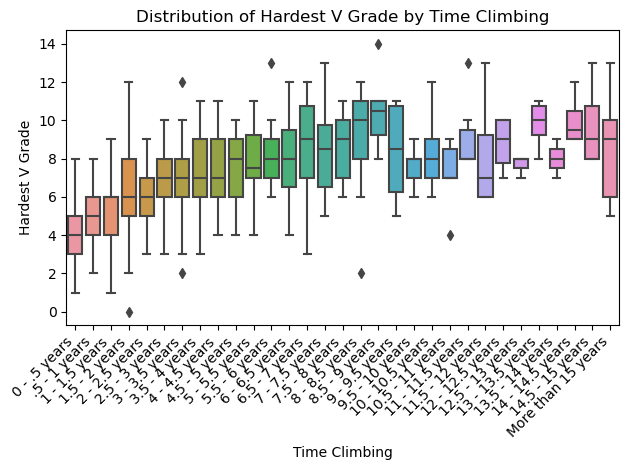

In [285]:
sns.boxplot(
    data=df,
    x='How long have you been climbing for?',
    y='Hardest V Grade ever climbed ',
    order=climb_order,

)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Hardest V Grade by Time Climbing')
plt.ylabel('Hardest V Grade')
plt.xlabel('Time Climbing')
plt.tight_layout()
plt.show()

In [286]:
df.columns

Index(['Timestamp', 'Height (cm)', 'Weight (KG)', 'Arm Span (cm)',
       'How long have you been climbing for?', 'Hardest V Grade ever climbed ',
       'Hardest V Grade climbed in the Last 3 months',
       'The V grade you can send 90-100% of routes ',
       'Hardest Route grade climbed (Ewbank grade) ',
       'Hardest route climbed last 3 months (ewbank)',
       'Route grade you can send 90-100% of climbs',
       'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Hangboard Frequency per week ', 'Hangboard grips used ',
       'Style of Hangboarding chosen ',
       'Max Weight hangboard 18mm edge - Half crimp (KG)  (10 seconds) (added weight only)',
       'Max Weight hangboard 18mm edge - open crimp (KG) (10 seconds)  (added weight only)',
       'Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)',
       'Min Edge used (mm, +kg if weight 

<Axes: xlabel='Frequency of climbing sessions per week', ylabel='Hardest V Grade ever climbed '>

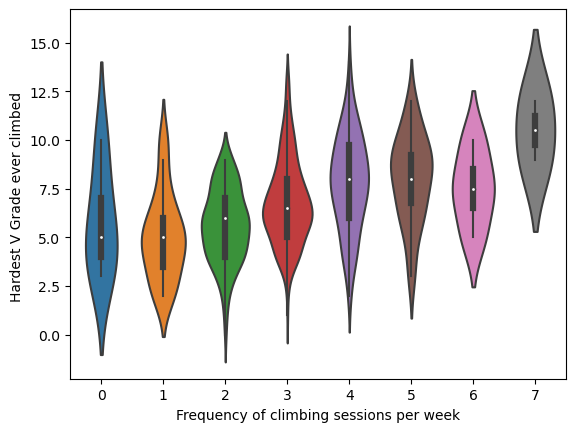

In [287]:
sns.violinplot(
    data=df,
    x='Frequency of climbing sessions per week',
    y='Hardest V Grade ever climbed '
)

C:\Users\theoi\AppData\Local\Temp\ipykernel_15760\3235951492.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Climbing Location'] = df[one_hot_cols].idxmax(axis=1).str.replace('Where do you climb?_', '')


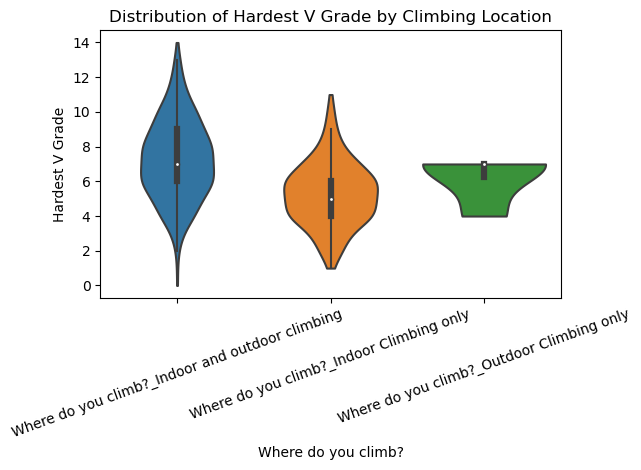

In [288]:
one_hot_cols = [
    'Where do you climb?_Indoor Climbing only',
    'Where do you climb?_Indoor and outdoor climbing',
    'Where do you climb?_Outdoor Climbing only'
]

df['Climbing Location'] = df[one_hot_cols].idxmax(axis=1).str.replace('Where do you climb?_', '')
sns.violinplot(
    data=df,
    x='Climbing Location',
    y='Hardest V Grade ever climbed ',
    cut=0
)
plt.title('Distribution of Hardest V Grade by Climbing Location')
plt.xlabel('Where do you climb?')
plt.ylabel('Hardest V Grade')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [289]:
vln_list = [ 'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Hangboard Frequency per week ', 'Campus Board frequency per week ','Frequency of Endurance training sesions per week','General Strength Training frequency per week ']

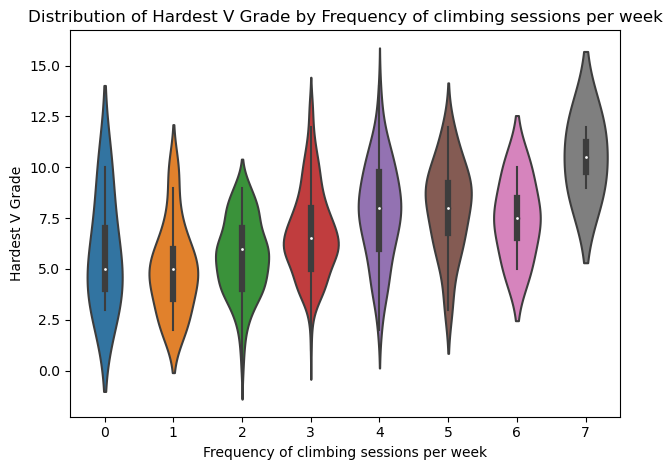

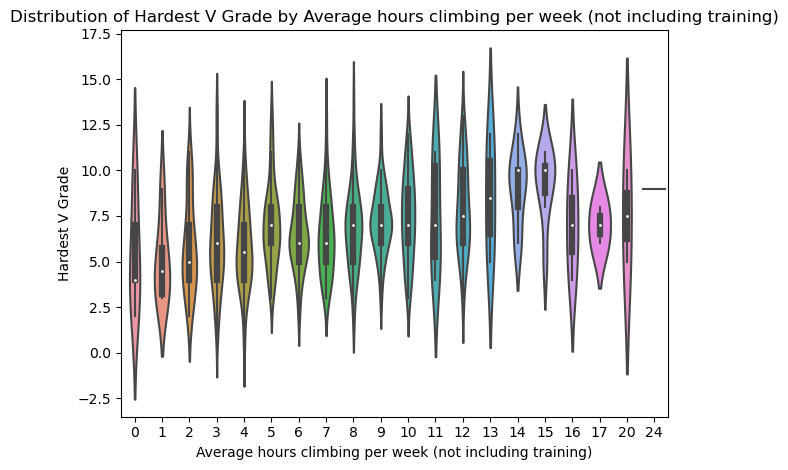

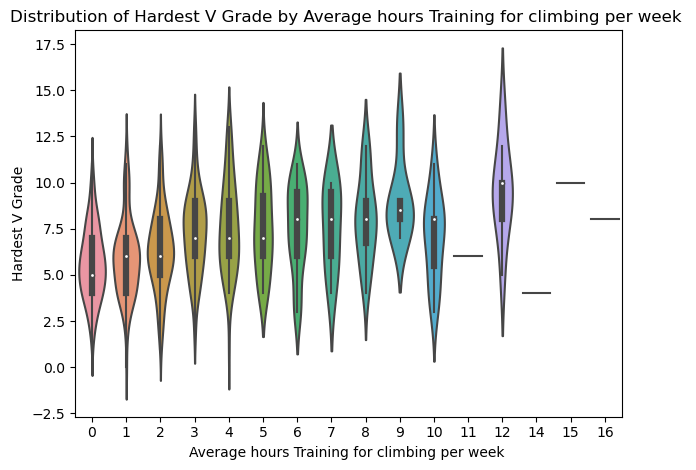

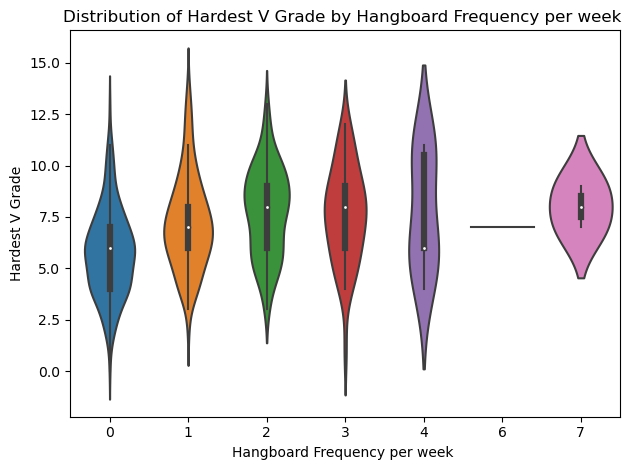

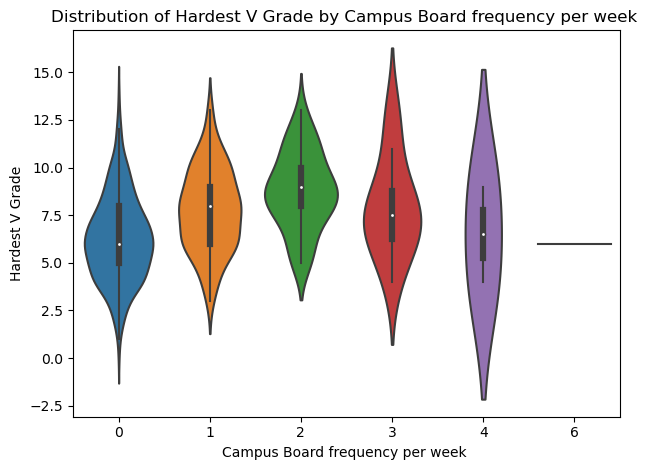

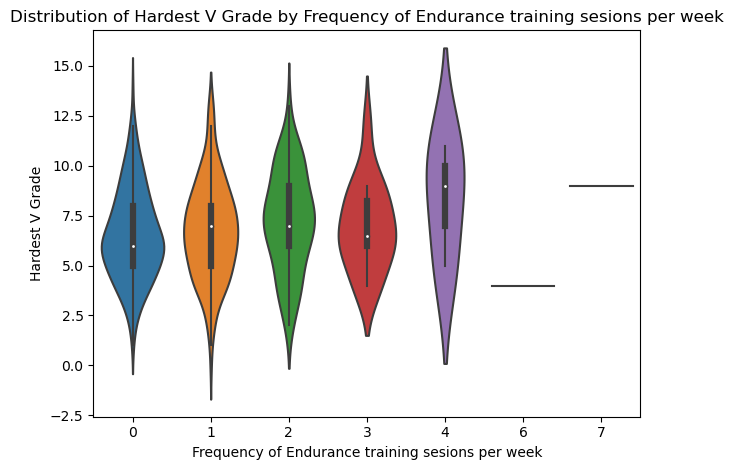

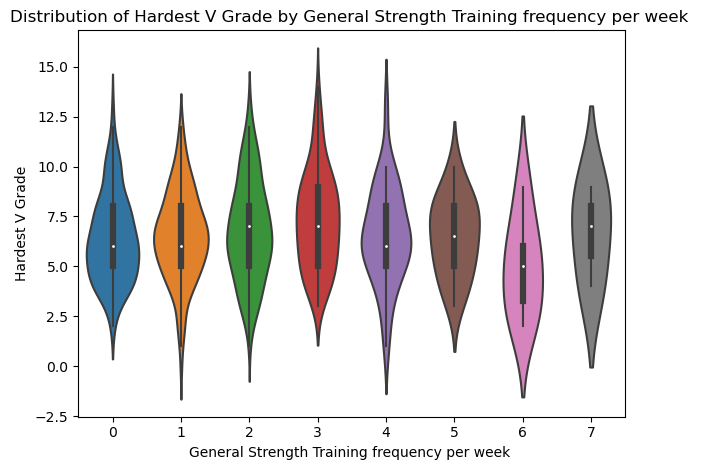

In [290]:
for col in vln_list:
       sns.violinplot(
              data=df,
              x=col,
              y='Hardest V Grade ever climbed '
       )
       plt.title(f'Distribution of Hardest V Grade by {col}')
       plt.xlabel(col)
       plt.ylabel('Hardest V Grade')
       #plt.xticks(rotation=20)
       plt.tight_layout()
       plt.show()

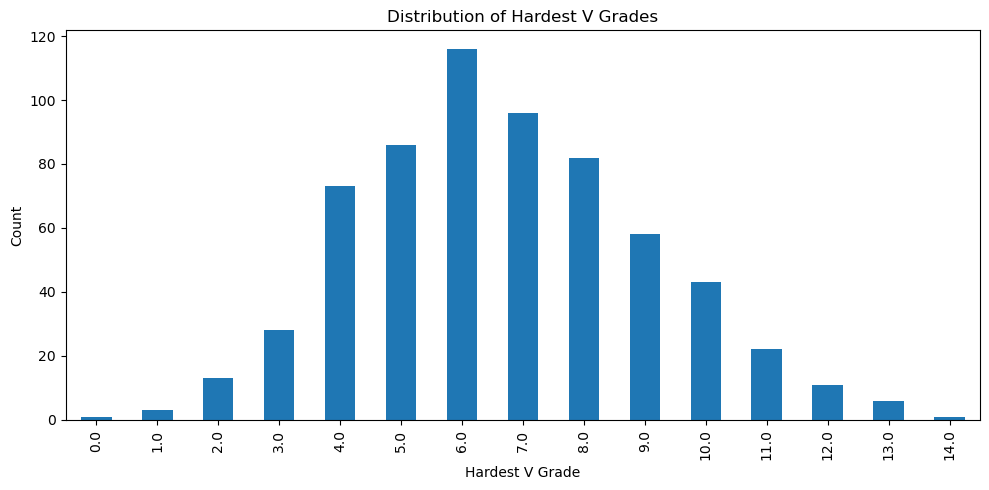

In [334]:
grade_counts = df['Hardest V Grade ever climbed ' ].value_counts().sort_index()
plt.figure(figsize=(10, 5))
grade_counts.plot(kind='bar')
plt.xlabel('Hardest V Grade')
plt.ylabel('Count')
plt.title('Distribution of Hardest V Grades')
plt.tight_layout()
plt.show()

In [291]:
df.isna().sum()

Timestamp                                           0
Height (cm)                                         0
Weight (KG)                                         0
Arm Span (cm)                                      22
How long have you been climbing for?                0
                                                   ..
Where do you climb?_Indoor and outdoor climbing     0
Where do you climb?_Outdoor Climbing only           0
Sex_Female                                          0
Sex_Male                                            0
Climbing Location                                   0
Length: 69, dtype: int64

In [292]:
df.head(5).style.set_table_attributes('style="overflow-x: auto; display: inline-block;"')


In [293]:
df['Type of Strength training'].unique()

array(['Antagonists, Legs, Core',
       'Antagonists, Legs, Core, Upper body pulling, Upper body pushing',
       'Antagonists, Core, Upper body pulling, Upper body pushing',
       'Antagonists, Legs, Core, No other strength training',
       'Core, Upper body pushing',
       'Legs, Core, Upper body pulling, Upper body pushing', 'Core',
       'No other strength training',
       'Antagonists, Core, Upper body pulling',
       'Core, Upper body pulling, Upper body pushing',
       'Antagonists, Core, Upper body pushing',
       'Legs, Upper body pulling, Upper body pushing',
       'Legs, Core, Upper body pushing',
       'Antagonists, Legs, Core, Upper body pushing',
       'Antagonists, Legs, Upper body pulling', 'Antagonists, Core',
       'Core, Upper body pulling',
       'Antagonists, Legs, Upper body pulling, Upper body pushing',
       'Antagonists',
       'Antagonists, Upper body pulling, Upper body pushing',
       'Antagonists, Legs, Core, Upper body pulling', 'Legs, Cor

In [294]:
all_types = set()
for s in df['Type of Strength training'].dropna():
    parts = [p.strip() for p in s.split(',')]
    all_types.update(parts)

print(sorted(all_types))

['Antagonists', 'Core', 'Legs', 'No other strength training', 'Upper body pulling', 'Upper body pushing']


In [295]:
for t in all_types:
    df[f"strength_{t.replace(' ', '_').lower()}"] = (
        df['Type of Strength training']
        .fillna('')
        .apply(lambda x: int(t in [p.strip() for p in x.split(',')]))
    )

In [296]:
def impute_arm_span(row):
    if pd.isna(row['Arm Span (cm)']) and not pd.isna(row['Height (cm)']):
        return row['Height (cm)'] * 1.03
    return row['Arm Span (cm)']
df['Arm Span (cm)'] = df.apply(impute_arm_span, axis=1)


In [297]:
df.head(5).style.set_table_attributes('style="overflow-x: auto; display: inline-block;"')


In [298]:
    """
    Additional Feature Ideas to consider:
    
    Heigh to weight ratio 
    Height to arm span ratio 
    total num,ber of training types used
    categorised experience
    """

'\nAdditional Feature Ideas to consider:\n\nHeigh to weight ratio \nHeight to arm span ratio \ntotal num,ber of training types used\ncategorised experience\n'

In [299]:
df.columns

Index(['Timestamp', 'Height (cm)', 'Weight (KG)', 'Arm Span (cm)',
       'How long have you been climbing for?', 'Hardest V Grade ever climbed ',
       'Hardest V Grade climbed in the Last 3 months',
       'The V grade you can send 90-100% of routes ',
       'Hardest Route grade climbed (Ewbank grade) ',
       'Hardest route climbed last 3 months (ewbank)',
       'Route grade you can send 90-100% of climbs',
       'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Hangboard Frequency per week ', 'Hangboard grips used ',
       'Style of Hangboarding chosen ',
       'Max Weight hangboard 18mm edge - Half crimp (KG)  (10 seconds) (added weight only)',
       'Max Weight hangboard 18mm edge - open crimp (KG) (10 seconds)  (added weight only)',
       'Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)',
       'Min Edge used (mm, +kg if weight 

In [303]:
feature_cols = df.columns.drop([
    'Timestamp',
    'Hardest V Grade ever climbed ',
    'How long have you been climbing for?',
    'The V grade you can send 90-100% of routes ',
    'Hardest route climbed last 3 months (ewbank)',
    'Route grade you can send 90-100% of climbs',
    'Hardest Route grade climbed (Ewbank grade) ',
    'Hardest V Grade climbed in the Last 3 months',
    'Hangboard grips used ',
    'Style of Hangboarding chosen ',
    'Endurance training ',
    'Type of Strength training',
    'Other activities (ie yoga, cardio)',
    'Climbing Location'
])

In [304]:
feature_cols

Index(['Height (cm)', 'Weight (KG)', 'Arm Span (cm)',
       'Frequency of climbing sessions per week',
       'Average hours climbing per week (not including training)',
       'Average hours Training for climbing per week ',
       'Hangboard Frequency per week ',
       'Max Weight hangboard 18mm edge - Half crimp (KG)  (10 seconds) (added weight only)',
       'Max Weight hangboard 18mm edge - open crimp (KG) (10 seconds)  (added weight only)',
       'Min Edge used (mm, +kg if weight added ) - Half Crimp (10 seconds)',
       'Min Edge used (mm, +kg if weight added) - Open crimp (10 seconds) ',
       'Campus Board frequency per week ',
       'Campus Board time per week (hours)',
       'Frequency of Endurance training sesions per week',
       'General Strength Training frequency per week ',
       'Time spent General strength training (hours)', 'Max pull up reps',
       '5 rep max weighted pull ups', 'max push ups reps', 'max L-sit time ',
       'Half Crimp', 'Open Crimp', 'F

In [305]:
feature_df = df[feature_cols] # Features only
target_df = df['Hardest V Grade ever climbed ']  # Target only

In [306]:
for col in feature_df.columns:
    if feature_df[col].isna().any():
        feature_df[f"{col}_missing"] = feature_df[col].isna().astype(int)

C:\Users\theoi\AppData\Local\Temp\ipykernel_15760\2918820031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df[f"{col}_missing"] = feature_df[col].isna().astype(int)
C:\Users\theoi\AppData\Local\Temp\ipykernel_15760\2918820031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df[f"{col}_missing"] = feature_df[col].isna().astype(int)
C:\Users\theoi\AppData\Local\Temp\ipykernel_15760\2918820031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [307]:
df_na = feature_df.isna().sum().reset_index()
df_na.columns = ['Column', 'Missing Values']
df_na.style.set_table_attributes('style="height:300px; overflow-y:auto; display:inline-block;"')

In [308]:
feature_df.style.set_table_attributes('style="height:300px; overflow-y:auto; display:inline-block;"')

In [309]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

In [335]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK




In [310]:
X_train,X_test,y_train, y_test = train_test_split(feature_df, target_df, test_size=0.2, random_state=42)

In [ ]:
def objective(params):
    model = xgb.XGBRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        gamma=params['gamma'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        random_state=42,
        n_jobs=-1
    )
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error').mean()
    return {'loss': -score, 'status': STATUS_OK}

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'gamma': hp.uniform('gamma', 0, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1)
}

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=40,
    trials=trials,
    rstate=np.random.default_rng(42)
)

print("Best hyperparameters:", best)

100%|██████████| 100/100 [01:05<00:00,  1.53trial/s, best loss: 1.515136900002049]
Best hyperparameters: {'colsample_bytree': 0.755522926012766, 'gamma': 0.5374090123972195, 'learning_rate': 0.028148259758837096, 'max_depth': 3.0, 'n_estimators': 280.0, 'reg_alpha': 0.10728926480504469, 'reg_lambda': 0.2693177528810003, 'subsample': 0.7085880258586605}


In [338]:
# Use best params from hyperopt for cross-validation
best_params = best.copy()
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = xgb.XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    random_state=42,
    n_jobs=-1
)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print("CV RMSE scores:", -cv_scores)
print("Mean CV RMSE:", -cv_scores.mean())

CV RMSE scores: [1.41267777 1.44179608 1.59143765 1.58575908 1.54401393]
Mean CV RMSE: 1.515136900002049


In [340]:
# Train final model on full training set with best params
final_model = xgb.XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train, y_train)

# Predict on test set
y_pred = final_model.predict(X_test)

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R2: {r2:.3f}")

# Actual vs Predicted table
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).reset_index(drop=True)
print(results_df.head(50))

Test RMSE: 1.640
Test R2: 0.516
    Actual  Predicted
0      3.0   3.579279
1      5.0   3.626234
2     10.0   8.144879
3      6.0   8.044374
4      8.0   8.904371
5      7.0   8.086812
6      6.0   5.465723
7      6.0   6.554092
8      9.0   8.606210
9      7.0   8.214273
10     7.0   4.906430
11     8.0   8.953429
12    13.0   6.754013
13     8.0   8.218332
14     9.0   9.067966
15     6.0   5.389668
16     6.0  10.331794
17     5.0   6.003757
18     4.0   6.357200
19     8.0   6.282104
20    10.0   9.607003
21     4.0   4.727710
22     4.0   7.209232
23     4.0   5.228403
24     5.0   3.872794
25     8.0   5.602804
26     9.0   7.010909
27     8.0   6.106895
28     7.0   7.024649
29    11.0  10.253534
30     4.0   4.482193
31     8.0   5.431299
32     8.0   8.744040
33    11.0   9.650330
34     7.0   8.755116
35     6.0   5.299394
36     7.0   6.276762
37     8.0   6.062089
38     5.0   4.162620
39     6.0   5.826027
40     4.0   6.867766
41     7.0   8.002942
42     6.0   5.696929
